___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

Jogadas Obtidas
 5    0.184
2    0.173
3    0.166
6    0.163
4    0.162
1    0.152
dtype: float64


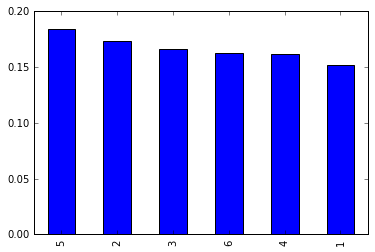

In [40]:
Jogadas = list()

for i in range(0, 1000):
    Jogadas.append(randint(1,7))

Dado = pd.Series(Jogadas)
values = Dado.value_counts(True)

print("Jogadas Obtidas\n", values)

values.plot(kind='bar')

A) Através do gráfico, é possível identificar que algumas jogadas são obtidas mais vezes que as outras, porém, no geral, todas as linhas demonstram a tendência de se aproximar de um certo número, equivalente à propabilidade individual.

B) A probabilidade real não é exatamente igual à probabilidade teórica pois quando nos referimos a probabilidade, nos referimos à chance de determinado evento acontecer. Porém, não indicamos que com certeza aquele evento irá acontecer, desse modo, podemos, sim, obter diferentes resultados. 

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

A) Há 6 possibilidades dentro de 36 possíveis de se obter soma 7 com dois dados. São elas, (6,1), (1,6), (5,2), (2,5), (4,3), (3,4). Desse modo a probabilidade de se conseguir soma 7 é de 6/36 = 1/6 = 0,1667.

B) Sabendo o número anterior, devemos preencher o número com outro no qual a soma dê 7. Desse modo, independentemente do número obtido no primeiro lançamento sempre haverá apenas 1 possibilidade em que a soma é igual a 7. Como são 6 números, saber o primeiro número não altera nada, já que am probabilidade continua em 1/6.

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [43]:
wins = 0
for i in range(0, 10000):
    premiada = randint(1,4)
    escolhida = randint(1,4)
    if premiada == escolhida:
        if premiada == escolhida == 1:
            aberta = randint(2,4)
        elif premiada == escolhida == 2:
            aberta = choice([1,3])
        elif premiada == escolhida == 3:
            aberta = randint(1,3)
    elif premiada != escolhida:
        aberta = premiada
        while aberta == escolhida or aberta == premiada:
            aberta = randint(1,4)
    #troca
    nova_escolha = escolhida
    while nova_escolha == escolhida or nova_escolha == aberta:
        nova_escolha = randint(1,4)
        
    if nova_escolha == premiada:
        wins += 1
print('Vitórias: ', wins)

Vitórias:  6656


In [44]:
wins = 0
for i in range(0, 10000):
    premiada = randint(1,4)
    escolhida = randint(1,4)
    if premiada == escolhida:
        if premiada == escolhida == 1:
            aberta = randint(2,4)
        elif premiada == escolhida == 2:
            aberta = choice([1,3])
        elif premiada == escolhida == 3:
            aberta = randint(1,3)
    elif premiada != escolhida:
        aberta = premiada
        while aberta == escolhida or aberta == premiada:
            aberta = randint(1,4)
        
    if escolhida == premiada:
        wins += 1
        
print('Vitórias: ', wins)

Vitórias:  3324


Segundo o Teorema de Baynes, logo no início, a chance de que o candidato escolha a porta correta é de 1/3. Desse modo, a chance que o prêmio esteja nas duas portas restantes será de 2/3.

Quando o Monty Hall abre uma das portas em que não há a premiação, a porta escolhida pelo candidato continua tendo a probabilidade de 1/3 se ser a correta, porém, segundo Baynes, há a propagação da probabilidade das portas anteriores para a porta restante, desse modo a porta não escolhida tem agora uma probabilidade de ser a premiada de 2/3.
Sendo assim, se o candidato mantém a escolha da porta, a chance de ganhar o prêmio é de 1/3, porém se ele muda a porta, a chance de ganhar o prêmio aumenta para 2/3.

Nos testes obtidos, vemos que, mesmo com uma margem de erro (aceitável, já que são eventos aleatórios), quando o candidato opta por mudar de porta, a porcentagem de acerto chega aos 66%, muito próximo da probabilidade calculada de 2/3 = 0.6667. Caso ele não mude a porta, vemos que ainda se comporta como o esperado, com cerca de 33% de acerto, assim, correspondente ao 1/3 calculado.